### Importando biliotecas e o dataset 

In [1]:
import pandas as pd
import re
import unicodedata
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from string import punctuation
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

stemmer = RSLPStemmer()

ru = 4563433
contador4563433 = 4563433

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [2]:
url = "https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv"
with open("pre-processed.csv", "wb") as f:
    f.write(requests.get(url).content)

df = pd.read_csv("pre-processed.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              7200 non-null   int64 
 1   label              7200 non-null   object
 2   preprocessed_news  7200 non-null   object
dtypes: int64(1), object(2)
memory usage: 168.9+ KB


### Pré-processamento do dataset

In [3]:
# Inicializar objetos
stop_words = set(stopwords.words('portuguese'))
stemmer = RSLPStemmer()

# Pré-processamento completo (1.1 a 1.7)
def preprocess(text, max_tokens=300):
    # Tokenizar + remover acentos/números
    tokens = text.split()
    tokens = [unicodedata.normalize('NFKD', t).encode('ASCII','ignore').decode('utf-8') for t in tokens]
    # Minúsculas + remover stopwords/pontuações
    tokens = [t.lower() for t in tokens if t.isalpha() and t not in stop_words]
    # Stemming
    tokens = [stemmer.stem(t) for t in tokens]
    # Truncamento para normalizar quantidade de palavras
    tokens = tokens[:max_tokens]
    # Remontar em string
    return ' '.join(tokens)

# Aplicar pré-processamento
df['processed'] = df['preprocessed_news'].apply(preprocess)

# Print único para Etapa 1
print("\n[Etapa 1] Pré-processamento completo (exemplo das 3 primeiras linhas):")
print(df[['label', 'processed']].head(3))

# TF-IDF otimizado
tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=15000, min_df=2, max_df=0.9)
X = tfidf.fit_transform(df['processed'])
y = df['label']
print("\n[Etapa 2] TF-IDF gerado. Dimensões da matriz:", X.shape)

# Identificador pessoal (RU)
contador4563433 = 4563433

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print("\n[Etapa 3] Divisão treino/teste concluída. Treino:", X_train.shape, "| Teste:", X_test.shape)

# Regressão logística balanceada
model = LogisticRegression(solver='lbfgs', max_iter=2000, class_weight='balanced')
model.fit(X_train, y_train)
print("\n[Etapa 4] Modelo treinado.")

# Predição e acurácia
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n[Etapa 5] RU: {contador4563433} | Acurácia final: {acc:.4f}")



[Etapa 1] Pré-processamento completo (exemplo das 3 primeiras linhas):
  label                                          processed
0  fake  kat abr diz vai coloc expulsa mold nao reclam ...
1  fake  ray peit bolsonar conserv fak entrev danil gen...
2  fake  reinald azeved desmascar polic feder ferrenh c...

[Etapa 2] TF-IDF gerado. Dimensões da matriz: (7200, 15000)

[Etapa 3] Divisão treino/teste concluída. Treino: (5400, 15000) | Teste: (1800, 15000)

[Etapa 4] Modelo treinado.

[Etapa 5] RU: 4563433 | Acurácia final: 0.9472


### Função para gerar nuvem

In [4]:
# Função para gerar nuvem de palavras com título e colormap
def gerar_nuvem_palavras(freq_dict, titulo="Nuvem de Palavras", colormap='viridis'):
    wc = WordCloud(width=800, height=400,
                   background_color='white',
                   colormap=colormap)
    wc.generate_from_frequencies(freq_dict)
    
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo)
    plt.show()

### Geração de imagem com palavras para textos verdadeiros

Textos verdadeiros - Unigramas: 13662, Bigramas: 123498, Trigramas: 58879


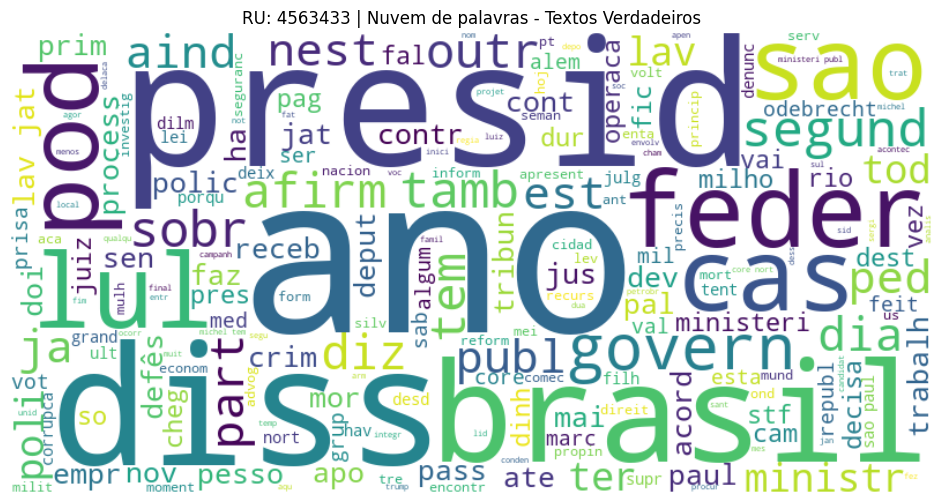

In [ ]:
# Textos verdadeiros
verdadeiros = df[df['label'] == 'true']['processed']

# N-gramas filtrados (unigramas + bigramas + trigramas)
vectorizer_true = CountVectorizer(ngram_range=(1,3), min_df=2, max_df=0.9)
X_true = vectorizer_true.fit_transform(verdadeiros)

# Frequências
freq_verdadeiros = dict(zip(vectorizer_true.get_feature_names_out(), X_true.toarray().sum(axis=0)))

# Contagem de unigramas, bigramas e trigramas
num_unigramas_true = sum(len(ng.split())==1 for ng in vectorizer_true.get_feature_names_out())
num_bigramas_true = sum(len(ng.split())==2 for ng in vectorizer_true.get_feature_names_out())
num_trigramas_true = sum(len(ng.split())==3 for ng in vectorizer_true.get_feature_names_out())

print(f"Textos verdadeiros - Unigramas: {num_unigramas_true}, Bigramas: {num_bigramas_true}, Trigramas: {num_trigramas_true}")

# Gerar nuvem incluindo trigramas
gerar_nuvem_palavras(freq_verdadeiros, 
                     titulo=f"RU: {ru} | Nuvem de palavras - Textos Verdadeiros", 
                     colormap='viridis')


### Geração de imagens de palavras para textos fakes

Textos falsos - Unigramas: 8716, Bigramas: 42775, Trigramas: 16226


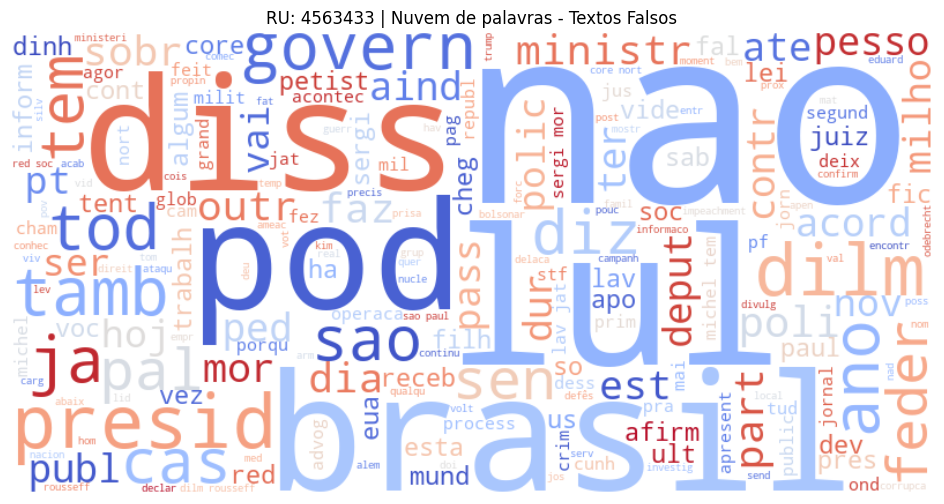

In [ ]:
# Textos falsos
falsos = df[df['label'] == 'fake']['processed']

# N-gramas filtrados (unigramas + bigramas + trigramas)
vectorizer_fake = CountVectorizer(ngram_range=(1,3), min_df=2, max_df=0.9)
X_fake = vectorizer_fake.fit_transform(falsos)

# Frequências
freq_falsos = dict(zip(vectorizer_fake.get_feature_names_out(), X_fake.toarray().sum(axis=0)))

# Contagem de unigramas, bigramas e trigramas
num_unigramas_fake = sum(len(ng.split())==1 for ng in vectorizer_fake.get_feature_names_out())
num_bigramas_fake = sum(len(ng.split())==2 for ng in vectorizer_fake.get_feature_names_out())
num_trigramas_fake = sum(len(ng.split())==3 for ng in vectorizer_fake.get_feature_names_out())

print(f"Textos falsos - Unigramas: {num_unigramas_fake}, Bigramas: {num_bigramas_fake}, Trigramas: {num_trigramas_fake}")

# Gerar nuvem incluindo trigramas
gerar_nuvem_palavras(freq_falsos, 
                     titulo=f"RU: {ru} | Nuvem de palavras - Textos Falsos", 
                     colormap='coolwarm')